<a href="https://colab.research.google.com/github/AllanHigorLP/Atividade-Avaliativa-1.2-RNA/blob/main/Atividade_1_2_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 Visão Geral dos Casos Confirmados

**Importando as bibliotecas**

In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics
import unicodedata

**Carregando o dataset**

In [83]:
df = pd.read_csv("https://covid19.manaus.am.gov.br/wp-content/uploads/Manaus.csv", delimiter=';', skiprows=0, low_memory=False)

In [84]:
df.head()

,_dt_evolucao,_dt_notificacao,_dt_sintomas,_classificacao,_conclusao,_origem,_comorb_cardio,_comorb_cromossomica,_comorb_diabetes,_comorb_hemato,_comorb_hepatica,_comorb_imuno,_comorb_neurologica,_comorb_obessidade,_comorb_renal,_comorb_respiratoria,_criterio,_etnia,_evolução,_idade,_faixa etária,_gestante,_profiss_saude,_raca,_se_notificacao,_sexo,_sintoma_dispneia,_sintoma_febre,_sintoma_garganta,_sintoma_tosse,_sintoma_outros,_srag,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_distrito,_taxa
0,25/01/2020 00:00,03/01/2020 00:00,01/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado,4.0,1a - 4a,NaN,NaN,Parda,1.0,M,Sim,Sim,Sim,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,TARUMA,TARUMÃ,OESTE,"0,243042897"
1,03/01/2020 00:00,03/01/2020 00:00,01/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado,26.0,20a - 29a,NaN,NaN,Parda,1.0,F,Sim,Sim,Sim,Sim,Sim,Influenza B,NaN,NaN,NaN,TARUMA-ACU,TARUMÃ-AÇÚ,OESTE,"0,684931507"
2,05/01/2020 00:00,03/01/2020 00:00,03/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado em UTI,27.0,20a - 29a,NaN,NaN,Parda,1.0,M,Sim,Sim,Sim,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,JORGE TEIXEIRA,JORGE TEIXEIRA,LESTE,"0,073137374"
3,16/01/2020 00:00,08/01/2020 00:00,04/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado em UTI,94.0,80a ou +,NaN,NaN,Parda,2.0,M,Sim,Sim,Sim,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,FLORES,FLORES,SUL,"0,198306463"
4,11/01/2020 00:00,08/01/2020 00:00,05/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado,0.0,< 1a,NaN,NaN,Parda,2.0,M,Sim,Sim,NaN,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,CIDADE DE DEUS,CIDADE DE DEUS,NORTE,"0,117699678"


### 1 - Quantos Atributos descrevem cada exemplo? Quais são eles?

In [85]:
df.columns


Index(['_dt_evolucao', '_dt_notificacao', '_dt_sintomas', '_classificacao',
       '_conclusao', '_origem', '_comorb_cardio', '_comorb_cromossomica',
       '_comorb_diabetes', '_comorb_hemato', '_comorb_hepatica',
       '_comorb_imuno', '_comorb_neurologica', '_comorb_obessidade',
       '_comorb_renal', '_comorb_respiratoria', '_criterio', '_etnia',
       '_evolução', '_idade', '_faixa etária', '_gestante', '_profiss_saude',
       '_raca', '_se_notificacao', '_sexo', '_sintoma_dispneia',
       '_sintoma_febre', '_sintoma_garganta', '_sintoma_tosse',
       '_sintoma_outros', '_srag', '_teste_anticorpo', '_teste_antigeno',
       '_teste_pcr', '_bairro', '_bairro_mapa', '_distrito', '_taxa'],
      dtype='object')

### 2 - Quantos casos confirmados há em Manaus, cumulativamente?

In [86]:
casosConfirmados = df.copy()
tam = len(casosConfirmados)
print("Casos confirmados: {}".format(tam))

Casos confirmados: 243984


### 3- A qual período de tempo a base de dados se refere, isto é, qual o registro mais antigo e qual o mais recente? Leve em conta a data de notificação.

In [87]:
df10 = df.copy()
df10._dt_notificacao = pd.to_datetime(df10._dt_notificacao) 
df10 = df10._dt_notificacao.dropna()
df10 = df10.sort_values()
df10 = df10.reset_index()
df10._dt_notificacao = df10['_dt_notificacao'].dt.strftime('%d/%m/%Y')
tam = len(df10)
print("Registro mais antigo:",df10._dt_notificacao.values[0])
print("Registro de mais recente:",df10._dt_notificacao.values[tam-1])

Registro mais antigo: 01/01/2020
Registro de mais recente: 29/12/2020


### Limpeza dos Dados

#### Verificando se há alguma inconsistência no conjunto de dados

In [88]:
df.drop(columns=['_comorb_cardio', '_comorb_cromossomica', '_comorb_diabetes', '_comorb_hemato', '_comorb_hepatica', '_comorb_imuno',	'_comorb_neurologica',	'_comorb_obessidade',	'_comorb_renal',	'_comorb_respiratoria', '_gestante',	'_profiss_saude',	'_raca', '_sintoma_dispneia',	'_sintoma_febre',	'_sintoma_garganta',	'_sintoma_tosse',	'_sintoma_outros','_etnia','_dt_evolucao','_dt_sintomas','_origem',	'_criterio','_evolução','_bairro_mapa',	'_distrito','_srag','_se_notificacao','_faixa etária', '_taxa'], inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243984 entries, 0 to 243983
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   _dt_notificacao   243913 non-null  object 
 1   _classificacao    243984 non-null  object 
 2   _conclusao        180928 non-null  object 
 3   _idade            243913 non-null  float64
 4   _sexo             243497 non-null  object 
 5   _teste_anticorpo  138919 non-null  float64
 6   _teste_antigeno   23196 non-null   float64
 7   _teste_pcr        58306 non-null   float64
 8   _bairro           240419 non-null  object 
dtypes: float64(4), object(5)
memory usage: 16.8+ MB


In [90]:
df.head(-1)

,_dt_notificacao,_classificacao,_conclusao,_idade,_sexo,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro
0,03/01/2020 00:00,Descartado,Recuperado,4.0,M,NaN,NaN,NaN,TARUMA
1,03/01/2020 00:00,Descartado,Óbito,26.0,F,NaN,NaN,NaN,TARUMA-ACU
2,03/01/2020 00:00,Descartado,Óbito,27.0,M,NaN,NaN,NaN,JORGE TEIXEIRA
3,08/01/2020 00:00,Descartado,Óbito,94.0,M,NaN,NaN,NaN,FLORES
4,08/01/2020 00:00,Descartado,Recuperado,0.0,M,NaN,NaN,NaN,CIDADE DE DEUS
...,...,...,...,...,...,...,...,...,...
243978,20/04/2020 00:00,Descartado,Recuperado,84.0,F,NaN,NaN,1.0,SANTO ANTONIO
243979,20/04/2020 00:00,Confirmado,NaN,50.0,F,NaN,NaN,1.0,Adrianópolis
243980,20/04/2020 00:00,Descartado,Recuperado,63.0,M,NaN,NaN,1.0,Adrianópolis
243981,20/04/2020 00:00,Descartado,Recuperado,53.0,M,NaN,NaN,1.0,CIDADE NOVA


#### Renomeando as colunas

In [91]:
df.rename(columns={'_dt_notificacao': 'dt_notificacao', '_classificacao': 'classificacao','_conclusao': 'conclusao', '_idade': 'idade','_faixa etária': 'faixa_etaria', '_sexo': 'sexo', '_bairro':'bairro','_taxa':'taxa','_teste_anticorpo':'teste_anticorpo','_teste_antigeno':'teste_antigeno',	'_teste_pcr':'teste_pcr'}, inplace=True)

#### **Deletando as linhas**

In [92]:
df['teste_anticorpo'].fillna(0, inplace=True)
df['teste_antigeno'].fillna(0, inplace=True)
df['teste_pcr'].fillna(0, inplace=True)
df = df.dropna()

In [93]:
df.head(-1)

,dt_notificacao,classificacao,conclusao,idade,sexo,teste_anticorpo,teste_antigeno,teste_pcr,bairro
0,03/01/2020 00:00,Descartado,Recuperado,4.0,M,0.0,0.0,0.0,TARUMA
1,03/01/2020 00:00,Descartado,Óbito,26.0,F,0.0,0.0,0.0,TARUMA-ACU
2,03/01/2020 00:00,Descartado,Óbito,27.0,M,0.0,0.0,0.0,JORGE TEIXEIRA
3,08/01/2020 00:00,Descartado,Óbito,94.0,M,0.0,0.0,0.0,FLORES
4,08/01/2020 00:00,Descartado,Recuperado,0.0,M,0.0,0.0,0.0,CIDADE DE DEUS
...,...,...,...,...,...,...,...,...,...
243975,14/04/2020 00:00,Descartado,Recuperado,56.0,F,0.0,0.0,1.0,COMPENSA I
243976,14/04/2020 00:00,Descartado,Recuperado,77.0,M,0.0,0.0,1.0,EDUCANDOS
243978,20/04/2020 00:00,Descartado,Recuperado,84.0,F,0.0,0.0,1.0,SANTO ANTONIO
243980,20/04/2020 00:00,Descartado,Recuperado,63.0,M,0.0,0.0,1.0,Adrianópolis


In [94]:
df.columns

Index(['dt_notificacao', 'classificacao', 'conclusao', 'idade', 'sexo',
       'teste_anticorpo', 'teste_antigeno', 'teste_pcr', 'bairro'],
      dtype='object')

#### Remoção de acentos e caracteres especiais

In [95]:
def normalizar_palavra(a):
    processamento_1 = unicodedata.normalize("NFD", a)
    processamento_2 = processamento_1.encode("ascii", "ignore")
    processamento_2 = processamento_2.decode("utf-8")
    a=processamento_2.upper()
    return a

In [96]:
df.bairro = df.bairro.apply(normalizar_palavra)
df.conclusao = df.conclusao.apply(normalizar_palavra)
df.classificacao = df.classificacao.apply(normalizar_palavra)


df.drop(df.loc[df['classificacao']=='DESCARTADO'].index, inplace=True)
df.drop(df.loc[df['classificacao']=='EM ANALISE'].index, inplace=True)
df.drop(df.loc[df['bairro']=='SEM DADOS'].index, inplace=True)

df.head(-1)

,dt_notificacao,classificacao,conclusao,idade,sexo,teste_anticorpo,teste_antigeno,teste_pcr,bairro
130,23/02/2020 00:00,CONFIRMADO,RECUPERADO,12.0,F,0.0,0.0,1.0,MAUAZINHO
144,28/02/2020 00:00,CONFIRMADO,RECUPERADO,39.0,F,0.0,0.0,1.0,NOVO ALEIXO
153,02/03/2020 00:00,CONFIRMADO,RECUPERADO,2.0,F,1.0,0.0,0.0,PRACA 14 DE JANEIRO
158,02/03/2020 00:00,CONFIRMADO,RECUPERADO,71.0,F,2.0,0.0,0.0,FLORES
196,11/03/2020 00:00,CONFIRMADO,RECUPERADO,46.0,F,0.0,0.0,2.0,CIDADE NOVA
...,...,...,...,...,...,...,...,...,...
225147,14/10/2020 00:00,CONFIRMADO,RECUPERADO,39.0,F,5.0,0.0,1.0,LIRIO DO VALE
225148,14/10/2020 00:00,CONFIRMADO,RECUPERADO,42.0,F,2.0,0.0,0.0,CAMPOS SALES
225149,12/09/2020 00:00,CONFIRMADO,RECUPERADO,23.0,F,0.0,0.0,2.0,ALEIXO
225153,08/10/2020 00:00,CONFIRMADO,RECUPERADO,48.0,F,2.0,0.0,0.0,MORRO DA LIBERDADE


### 1 - Quantos exemplos e atributos há na base de dados após a limpeza e organização?

In [97]:
print(list(df.columns))
print("Quantidade de exemplos: {}".format(len(df)))

['dt_notificacao', 'classificacao', 'conclusao', 'idade', 'sexo', 'teste_anticorpo', 'teste_antigeno', 'teste_pcr', 'bairro']
Quantidade de exemplos: 42684


## 2 - Qual a porcentagem de indivíduos recuperados em relação ao todo?

In [98]:
freq = df['conclusao'].value_counts()
total_rows = len(df.index)
porcentagem = freq[0]/total_rows
print('Porcentagem de casos recuperados: {}%'.format(round(porcentagem*100, 1)))

Porcentagem de casos recuperados: 92.0%


## 3 - Os casos acometeram mais indivíduos do sexo masculino ou feminino?

In [99]:
sexo = df['sexo'].value_counts()
print("Casos Femininos: {}\nCasos Masculino: {}\n\nOs casos acometeram mais indivíduos do sexo feminimo.".format(sexo[0], sexo[1]))

Casos Femininos: 22901
Casos Masculino: 19783

Os casos acometeram mais indivíduos do sexo feminimo.


## 4 - Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?

In [100]:
desv_padrao = df['idade'].std()
media = df['idade'].mean()
max = df['idade'].max()
min = df['idade'].min()

print('Desvio Padrão: {:.1f}\nMédia: {:.1f}\nMax: {:.0f}\nMin: {:.0f}'.format(desv_padrao, media, max, min))

Desvio Padrão: 17.3
Média: 43.4
Max: 120
Min: 0


## 5 - Qual o bairro com maior incidência de casos?

### Tratamento - Separando apenas casos confirmados

In [101]:
bairro = df['bairro'].value_counts()
print(bairro)

SAO JOSE OPERARIO               2351
JORGE TEIXEIRA                  1986
CIDADE NOVA                     1820
COMPENSA                        1817
ALVORADA                        1814
                                ... 
RENATO SOUZA PINTO I               1
CIDADE NOVA CONJUNTO MANOA 2       1
OSVALDO FROTA 2                    1
N S DA GRACAS                      1
MARCO                              1
Name: bairro, Length: 1079, dtype: int64


## 6 - Quais os três bairros com maior incidência de casos recuperados?

In [102]:
novo = df.groupby(['bairro'])['conclusao'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)

primeiro = novo.iloc[0]['bairro']
segundo = novo.iloc[1]['bairro']
terceiro = novo.iloc[2]['bairro']

print('Os três bairros com maior incidência de casos recuperados são: {}, {} e {}'.format(primeiro,segundo,terceiro))

Os três bairros com maior incidência de casos recuperados são: SAO JOSE OPERARIO, JORGE TEIXEIRA e CIDADE NOVA


## 7 - Quais os tipos de testes efetuados, segundo os dados? Indique os dados de maneira quantitativa e percentual.

In [103]:
def soma(n):
  novaLista = []
  for i in n:
    if(i != 0.0):
      novaLista.append(i)

  print("Quantidade de pessoas que fizeram o teste: {}".format(len(novaLista)))

  porc_teste = len(novaLista)/len(n)

  return round(porc_teste*100, 1)

print("Quantidade de pessoas: {}\n".format(len(df)))
print("Teste Antigeno: {}%\n------\n".format(soma(df['teste_antigeno'])))
print("Teste Anticorpo: {}%\n------\n".format(soma(df['teste_anticorpo'])))
print("Teste Pcr: {}%\n------\n".format(soma(df['teste_pcr'])))

Quantidade de pessoas: 42684

Quantidade de pessoas que fizeram o teste: 4181
Teste Antigeno: 9.8%
------

Quantidade de pessoas que fizeram o teste: 26711
Teste Anticorpo: 62.6%
------

Quantidade de pessoas que fizeram o teste: 12048
Teste Pcr: 28.2%
------



## 8 - Qual taxa de letalidade pode ser calculada a partir do conjunto de dados? Para calcular esta taxa, considere a fração do total de óbitos pelo total de casos;

In [104]:
qtdeObito = df['conclusao'].value_counts()
taxaLetalidade = qtdeObito[1]/total_rows

print('Porcentagem de Obitos: {}%'.format(round(taxaLetalidade*100, 1)))

Porcentagem de Obitos: 7.8%


## 9 - Qual o tipo de correlação, mediante coeficiente de correlação de Pearson, entre a idade e o número de casos? Para responder a esta pergunte, agrupe o número de casos por idade e efetue o cálculo de tal coeficiente. Indique, a partir do resultado, a natureza desta correlação, se é positiva ou negativa, e qual sua intensidade.

In [105]:
pearson = df.groupby(['idade'])['classificacao'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
print(pearson.corr())
print('\nVisto que a correlação é negativa, isso significa que as variáveis são inversamente relacionadas\n')
print('Sua intensidade é de -0.215287')

          idade     Count
idade  1.000000 -0.355446
Count -0.355446  1.000000

Visto que a correlação é negativa, isso significa que as variáveis são inversamente relacionadas

Sua intensidade é de -0.215287


# 2.2 Visualização de Dados

## 1 - Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. Inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual;

In [106]:
#Foi criada uma lista contendo os 10 bairros com mais casos.
df2 = df.copy()
bairros = df2.groupby(['bairro'])['classificacao'].count().reset_index(name='casos').sort_values(['casos'], ascending=False).apply(list)
bairros = bairros[:11]
bairros = bairros.reset_index()

#A função abaixo percorre a lista de bairros do dataframe cópia (df2), alterando o nome dos bairros com menos casos para "OUTROS"
def retirar_menos_sig(a):
    for i in range(10):
      if a == bairros.bairro[i]:
        return a
    a = 'OUTROS'
    return a

#como para esse gráfico foi usado uma cópia do nosso dataset, optamos por utilizar a coluna do "teste_pcr" como marcadora
#dos indices de cada bairro para que assim, pudessemos gerar nosso Histograma de maneira ordenada

def ordenar(a):
    for i in range(10):
      if a == bairros.bairro[i]:
        return float(i)

df2.bairro= df2.bairro.apply(retirar_menos_sig)
df2.teste_pcr = df2.bairro.apply(ordenar)
df2 = df2.sort_values(['teste_pcr'])
df2

,dt_notificacao,classificacao,conclusao,idade,sexo,teste_anticorpo,teste_antigeno,teste_pcr,bairro
86358,27/07/2020 00:00,CONFIRMADO,RECUPERADO,45.0,F,0.0,2.0,0.0,SAO JOSE OPERARIO
58985,05/05/2020 00:00,CONFIRMADO,RECUPERADO,39.0,F,1.0,0.0,0.0,SAO JOSE OPERARIO
59019,04/05/2020 00:00,CONFIRMADO,RECUPERADO,46.0,F,1.0,0.0,0.0,SAO JOSE OPERARIO
215325,08/09/2020 00:00,CONFIRMADO,RECUPERADO,35.0,M,1.0,0.0,0.0,SAO JOSE OPERARIO
59037,30/04/2020 00:00,CONFIRMADO,RECUPERADO,33.0,F,1.0,0.0,0.0,SAO JOSE OPERARIO
...,...,...,...,...,...,...,...,...,...
225147,14/10/2020 00:00,CONFIRMADO,RECUPERADO,39.0,F,5.0,0.0,NaN,OUTROS
225148,14/10/2020 00:00,CONFIRMADO,RECUPERADO,42.0,F,2.0,0.0,NaN,OUTROS
225149,12/09/2020 00:00,CONFIRMADO,RECUPERADO,23.0,F,0.0,0.0,NaN,OUTROS
225153,08/10/2020 00:00,CONFIRMADO,RECUPERADO,48.0,F,2.0,0.0,NaN,OUTROS


In [107]:
bairros

,index,bairro,casos
0,977,SAO JOSE OPERARIO,2351
1,514,JORGE TEIXEIRA,1986
2,184,CIDADE NOVA,1820
3,291,COMPENSA,1817
4,65,ALVORADA,1814
5,368,COROADO,1813
6,1006,TARUMA,1289
7,439,FLORES,1130
8,1004,TANCREDO NEVES,1120
9,884,REDENCAO,1030


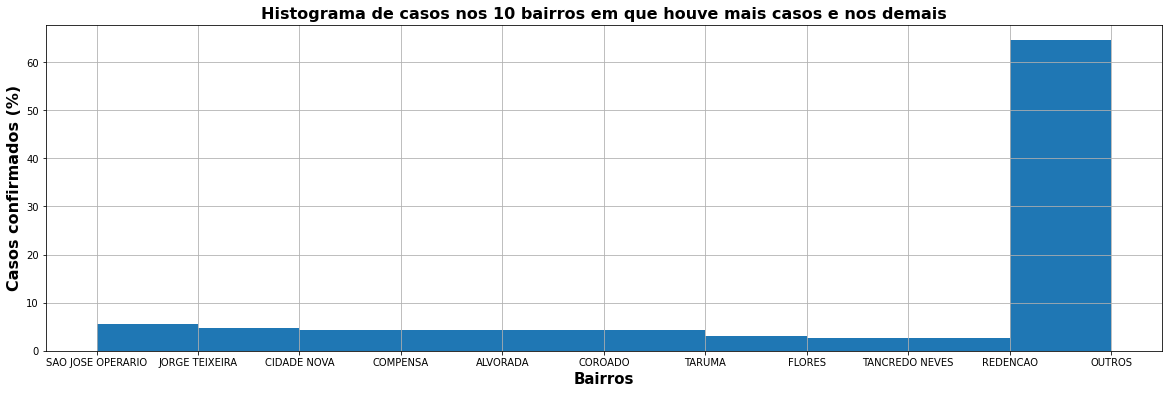

In [108]:
#Criamos então o Histograma contendo os bairros com mais casos. 
#Podemos notar que a pouco menos de 40% dos casos ocorreram nos 10 bairros
#que registraram mais casos, enquanto o restante ocorreu nos demais bairros da capital

df2.bairro.hist(grid=True, weights=np.ones_like(df2[df2.columns[0]]) * 100. / len(df2),
                  figsize=(20, 6), linewidth=5)

plt.title("Histograma de casos nos 10 bairros em que houve mais casos e nos demais", fontsize=16,weight='bold')
plt.ylabel("Casos confirmados (%)",fontsize=16,weight='bold')
plt.xlabel("Bairros",fontsize=15,weight='bold')
plt.show()

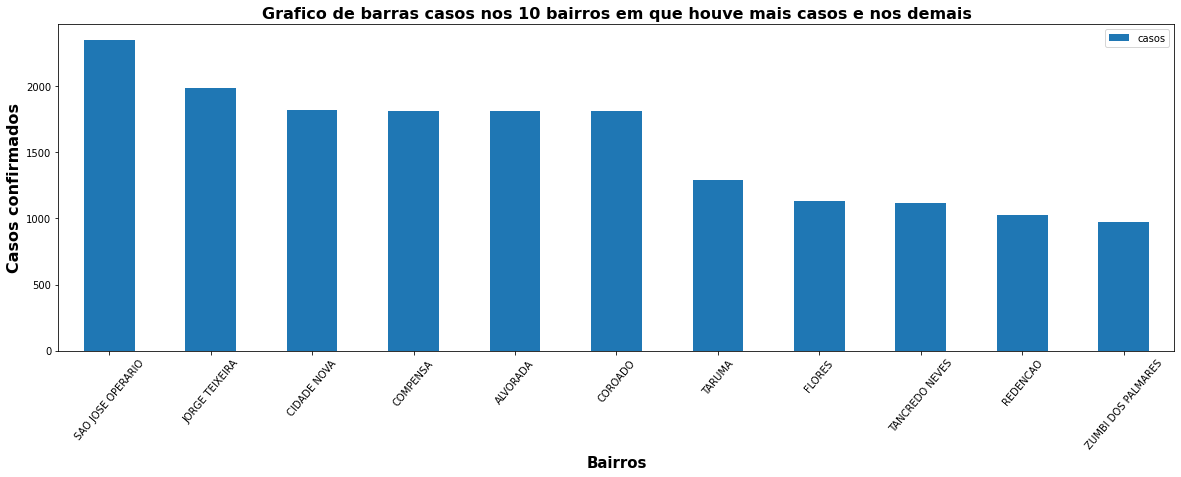

In [109]:
#Para facilitar ainda mais a visualização, abaixo segue o gráfico de barras contendo os casos nos 10 bairros com mais casos

bairros.plot.bar(x="bairro", y="casos",rot=50,figsize=(20, 6))

plt.title("Grafico de barras casos nos 10 bairros em que houve mais casos e nos demais", fontsize=16,weight='bold')
plt.ylabel("Casos confirmados",fontsize=16,weight='bold')
plt.xlabel("Bairros",fontsize=15,weight='bold')
plt.show()

## 2 - Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


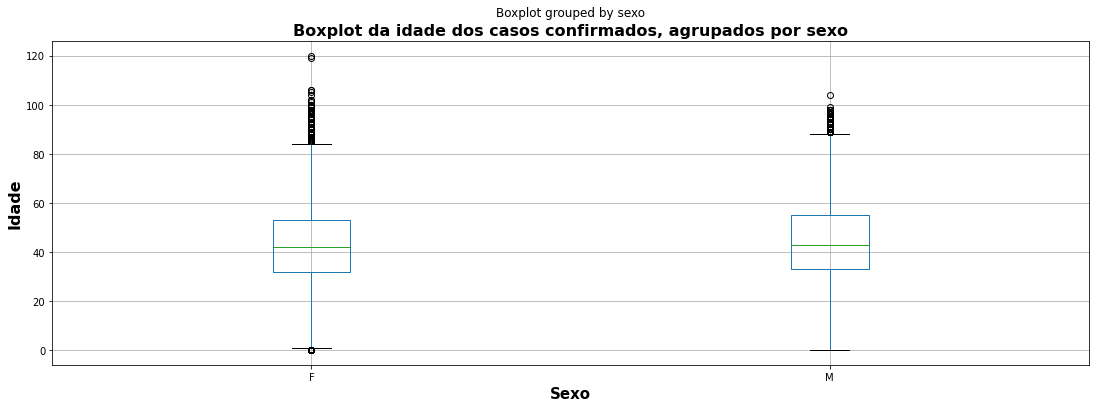

In [110]:
df.boxplot(column = 'idade', by='sexo', grid =True, figsize=(18, 6))
plt.title("Boxplot da idade dos casos confirmados, agrupados por sexo", fontsize=16,weight='bold')
plt.ylabel("Idade",fontsize=16,weight='bold')
plt.xlabel("Sexo",fontsize=15,weight='bold')
plt.show()